In [1]:
# Colunas existentes
#   DiaInicio
#   DtHoraInicio
#   DtHoraFim
#   Processo
#   TempoMinutos
#   TempoMinutosInicioExecucao

In [2]:
# Sugiro estudar o fluxo proposto por Box e Jenkins (1976): 
# 1:Plotar a série e examinar; 
# 2: Diferenciar a série até ficar estacionária e fazer transformações, se necessário; 
# 3: Usar séries diferenciadas para definir p e q; 
# 4: Implementar o Arima nos dados originais; 
# 5: Checar se é um bom modelo; 
# 6: Usar o modelo para fazer previsões.

In [3]:
#Casos a serem avaliados
# a) Tempo de duração da Rotina 04
# b) Início de execução da Rotina 01
# c) Tempo de duração da Rotina 01


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np

from statsmodels.tsa.stattools import adfuller

In [5]:
rotina = 'Rotina_01'
coluna = 'TempoMinutos'

In [6]:
# Monta DataFrame somente com as informações que interessam para o estudo
df = pd.read_excel('DataFrame_Processos_Percentual_Base_CompletaAjusteOutLiers.xlsx')
df = df.loc[df['Processo']==rotina]

# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(df, columns = ['DiaInicio', coluna])

df.Dtinicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)

df.head()

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,TempoMinutos
DiaInicio,
2021-01-05,139
2021-01-06,101
2021-01-07,114
2021-01-08,112
2021-01-09,138


In [7]:
# pandas_series_parte1

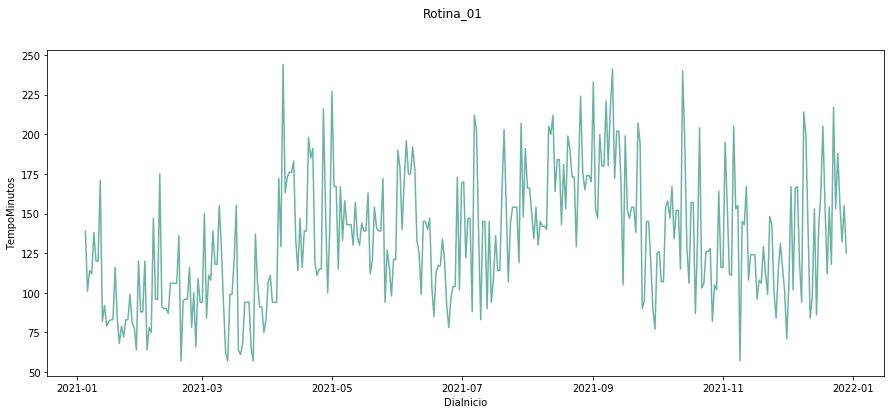

In [8]:
# Plotagem - Gráfico Linha
fig, axes = plt.subplots(figsize=(15, 6))
fig.suptitle(rotina)

# Grafico Rotina 01
sns.lineplot(data=df, x=df.index , y=coluna, ci=None, color='#69b3a2', estimator=sum )

DiaInicio
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TempoMinutos, dtype: object

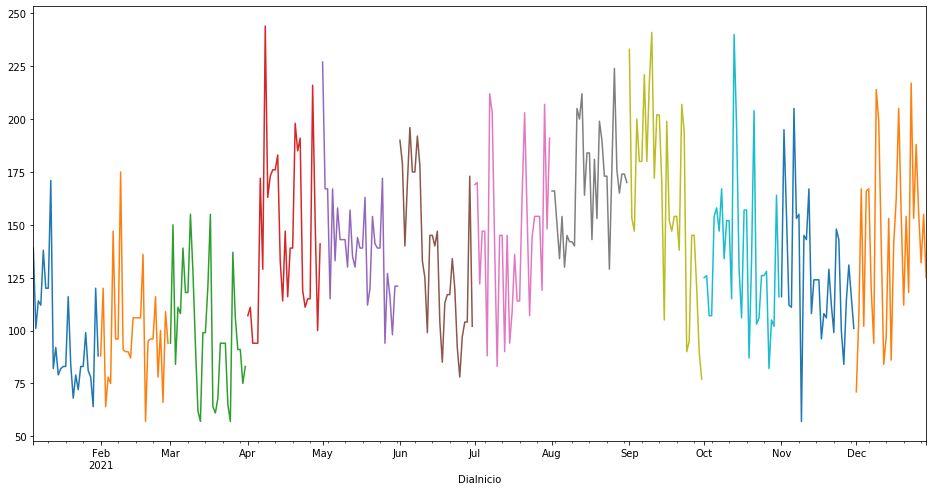

In [9]:
# Separando por cores
# df['TempoMinutos'].groupby(df.index.month).plot(figsize=(16, 8))
df[coluna].groupby(df.index.month).plot(figsize=(16, 8))

In [10]:
#Para plotar as médias móveis para n períodos, utilizamos o comando Series.rolling(numero_de_periodos).mean().plot()

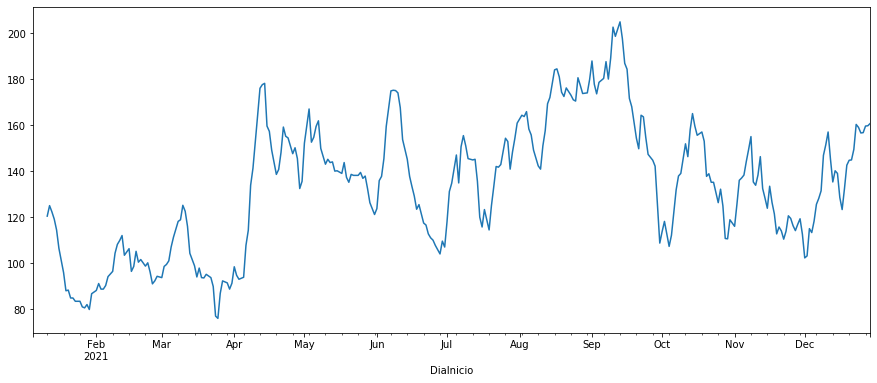

In [52]:
# Média móvel de  dias
# df.TempoMinutos.rolling(14).mean().plot(figsize=(15, 6))
df[coluna].rolling(7).mean().plot(figsize=(15, 6))

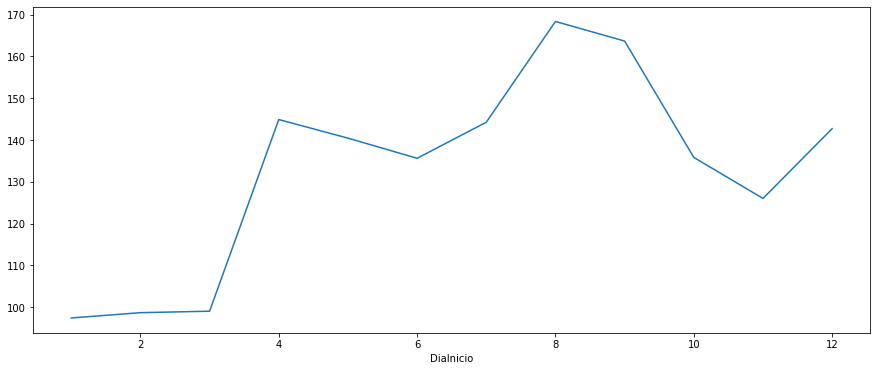

In [12]:
# Tempo médio de processamento - Gráfico linha
# df.TempoMinutos.groupby(df.index.month).mean().plot(figsize=(15, 6))
df[coluna].groupby(df.index.month).mean().plot(figsize=(15, 6))

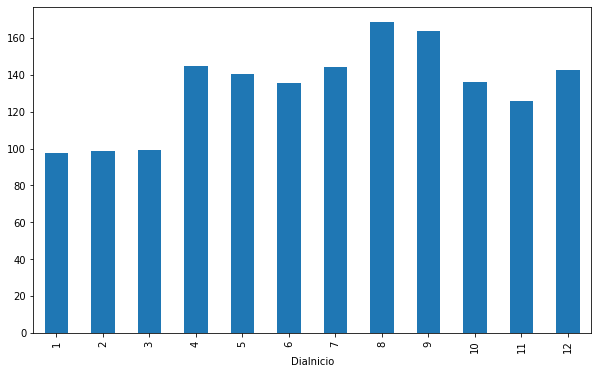

In [13]:
# Tempo médio de processamento - Gráfico barra
# df.TempoMinutos.groupby(df.index.month).mean().plot(kind='bar', figsize=(10, 6))
df[coluna].groupby(df.index.month).mean().plot(kind='bar', figsize=(10, 6))

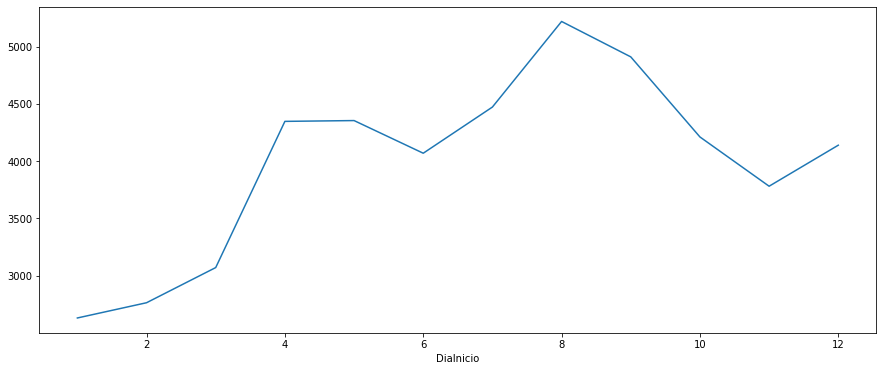

In [14]:
# Soma tempo de processamento
# df.TempoMinutos.groupby(df.index.month).sum().plot(figsize=(15, 6))
df[coluna].groupby(df.index.month).sum().plot(figsize=(15, 6))

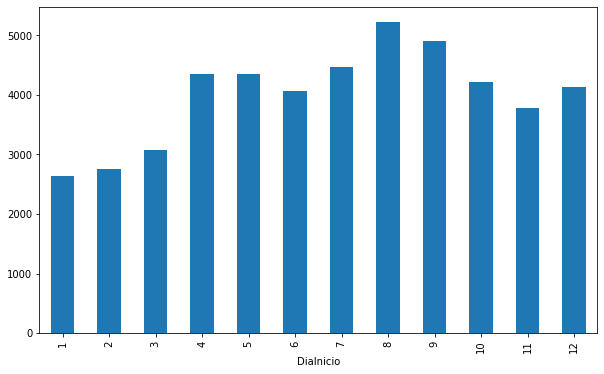

In [15]:
# Soma tempo de processamento - Gráfico barra
# df.TempoMinutos.groupby(df.index.month).sum().plot(kind='bar', figsize=(10, 6))
df[coluna].groupby(df.index.month).sum().plot(kind='bar', figsize=(10, 6))

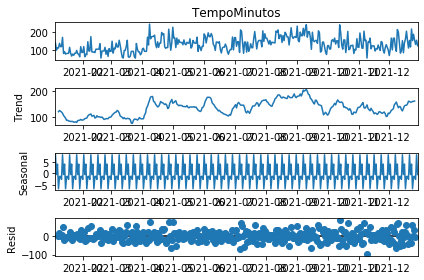

In [16]:
# Decompondo a série
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df[coluna])
results.plot();

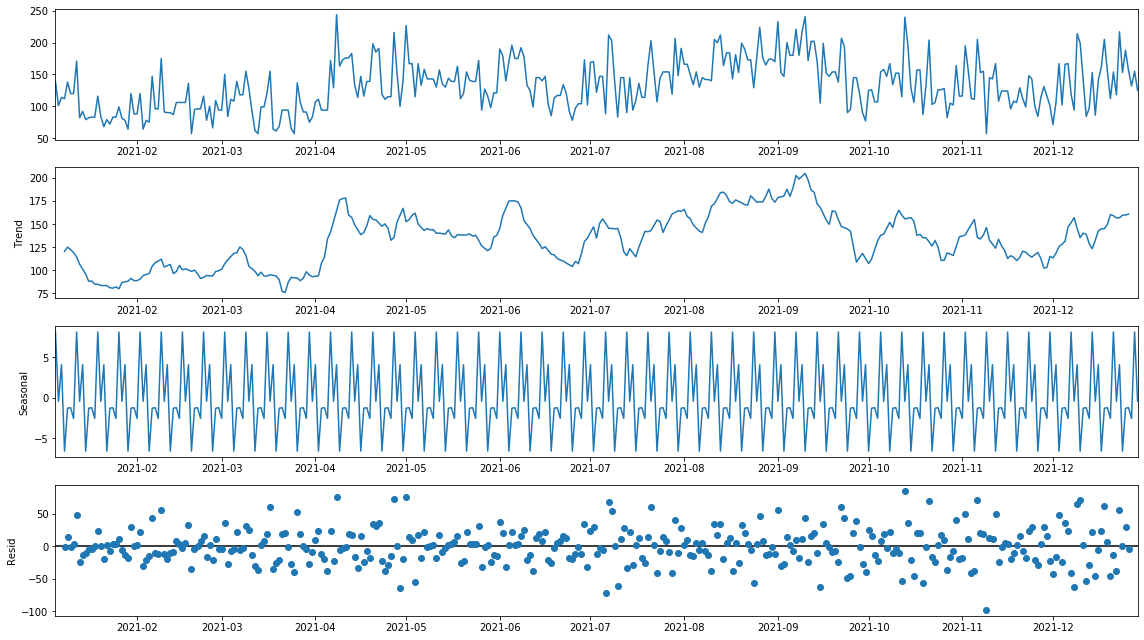

In [18]:
# Decompondo a série
import statsmodels as sm
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [16.0,9.0]

In [ ]:
# Efetuar teste para avaliar se está estacionário

In [25]:
# Augmented Dickey-Fuller (ADF) Statistic 
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %.15f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.682064
p-value: 0.077193708063946
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [20]:
'''
Test statistic: -2.682
P-value: 0.077193708
Since the p-value is not less than .05, we fail to reject the null hypothesis.

Isso significa que a série temporal não está estacionária. Em outras palavras, tem alguma 
estrutura dependente do tempo e não tem variância constante ao longo do tempo.

Teste Augmented Dickey-Fuller
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
'''

'\nTest statistic: -2.682\nP-value: 0.077193708\nSince the p-value is not less than .05, we fail to reject the null hypothesis.\n\nIsso significa que a série temporal não está estacionária. Em outras palavras, tem alguma \nestrutura dependente do tempo e não tem variância constante ao longo do tempo.\n\nTeste Augmented Dickey-Fuller\np-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.\np-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.\n'

In [24]:
# Augmented Dickey-Fuller (ADF) Statistic - com uma diferenciação
df_diff = pd.DataFrame(df.values, columns=[coluna])
df_diff = df_diff.diff(periods=1).dropna()
result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %.15f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.525619
p-value: 0.000000000000107
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [26]:
# Com uma diferenciação o p_value passa, pois é menor que 0.05
# Não será necessário efetuar transformações com log e nem com Box_Cox

In [27]:
### Diferenças
# O procedimento utilizado para eliminar a tendência é conhecido na literatura como procedimento para 
# transformação de uma série não estacionária em uma série estacionária. 

#Normalmente, será necessária somente uma ou duas diferenças para que a série se torne estacionária.

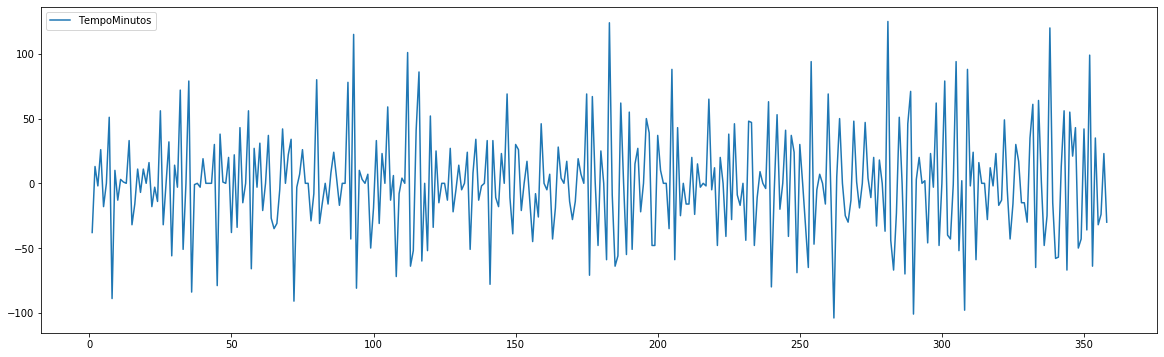

In [28]:
# Plotagem da série com diferenciação
# df.TempoMinutos.diff(1).plot(figsize=(20, 6))
# df[coluna].diff(1).plot(figsize=(20, 6))
df_diff.plot(figsize=(20, 6))

In [ ]:
# Histogramas

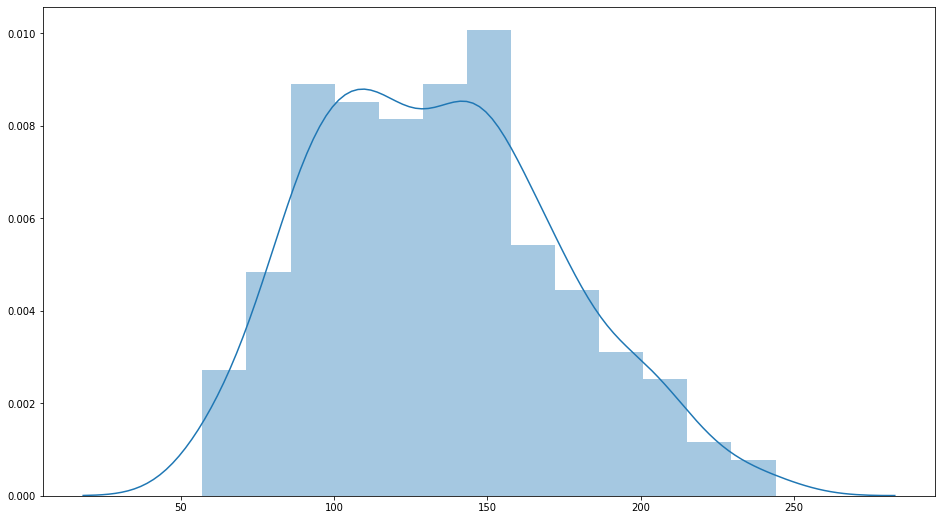

In [29]:
# Original
sns.distplot(df, hist=True, kde=True)

# plot the distribution of the transformed data values
# sns.distplot(df_diff, hist=True, kde=True)

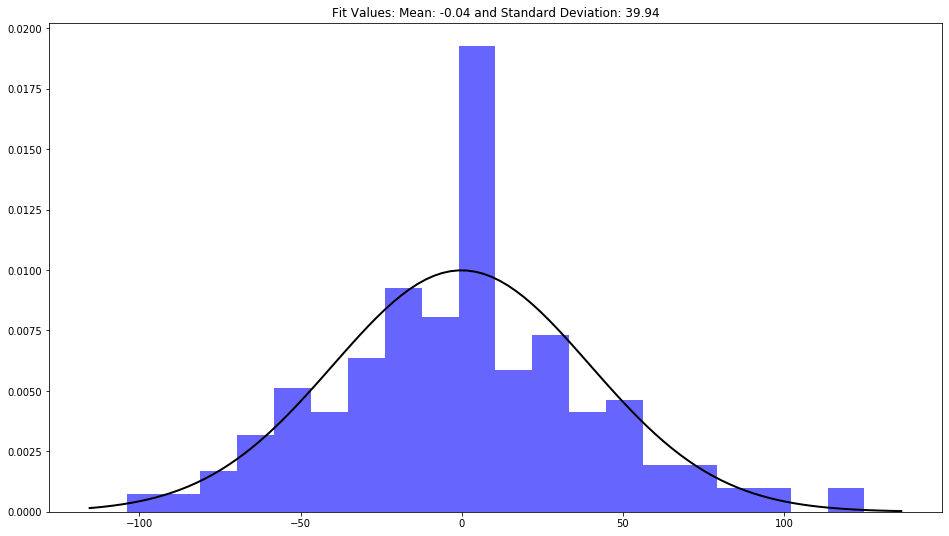

In [30]:
from scipy.stats import norm
 
# Fit a normal distribution to the data: mean and standard deviation
mu, std = norm.fit(df_diff) 
  
# Plot the histogram.
plt.hist(df_diff[coluna], bins=20, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: Mean: {:.2f} and Standard Deviation: {:.2f}".format(mu, std)
plt.title(title)

plt.show()

In [ ]:
# pandas_series_parte4

# Autocorrelação
# É a correlação da série com ela mesma. Em séries temporais, será a correlação
# entre a série e uma LAG (valores anteriores)

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

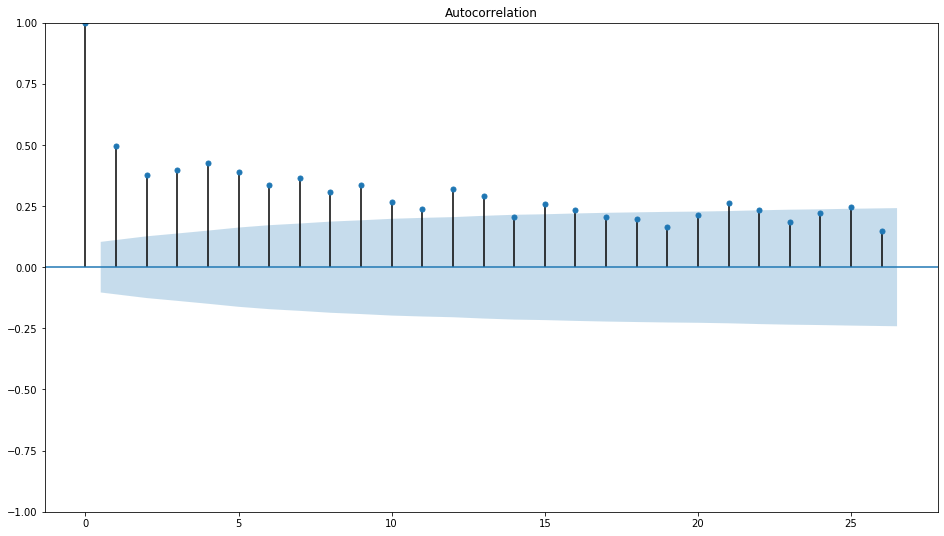

In [33]:
# AutoCorrelação Total - Sem Diferenciação
#plot_acf(df[coluna], lags=20)
plot_acf(df[coluna])
plt.show()

C:\Users\Michael\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


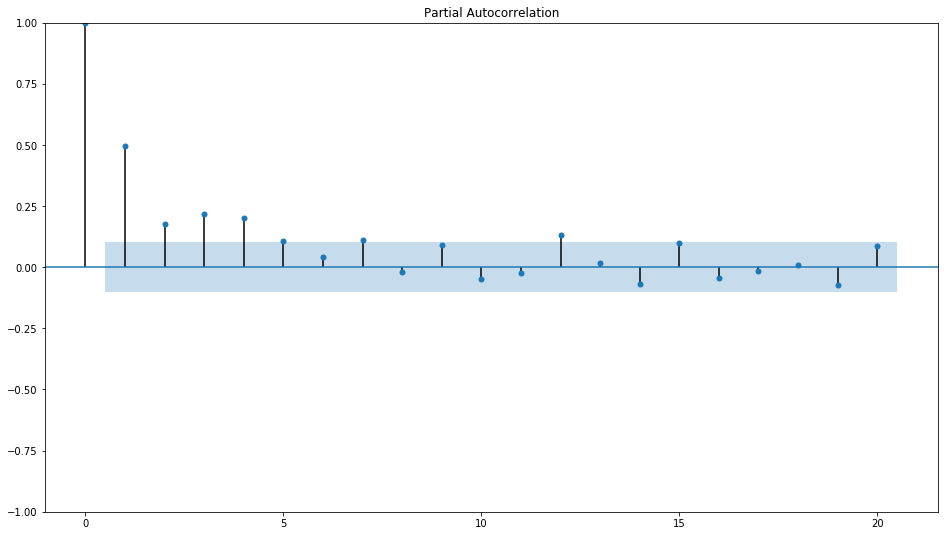

In [34]:
# AutoCorrelação Parcial - Sem Diferenciação
plot_pacf(df[coluna], lags=20)
plt.show()

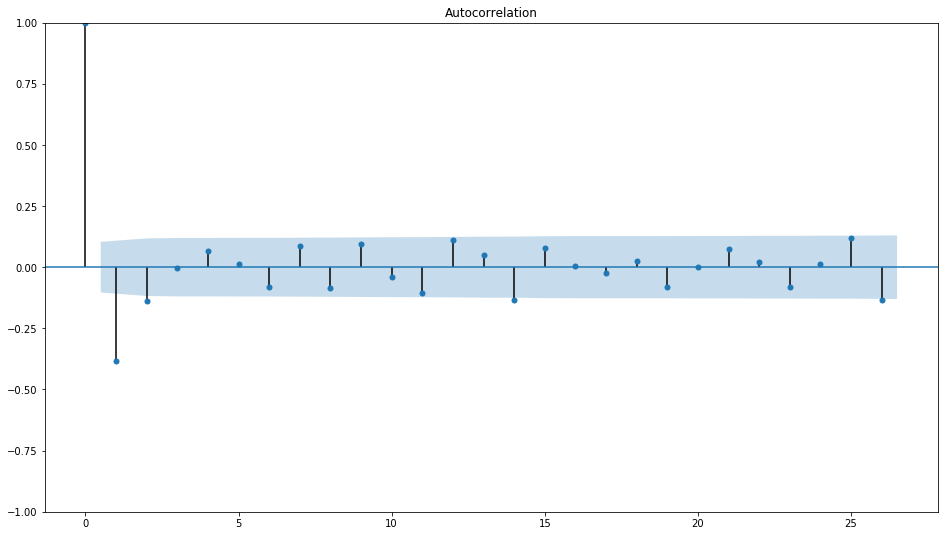

In [35]:
# AutoCorrelação Total - Com Diferenciação
plot_acf(df_diff[coluna])
plt.show()

C:\Users\Michael\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


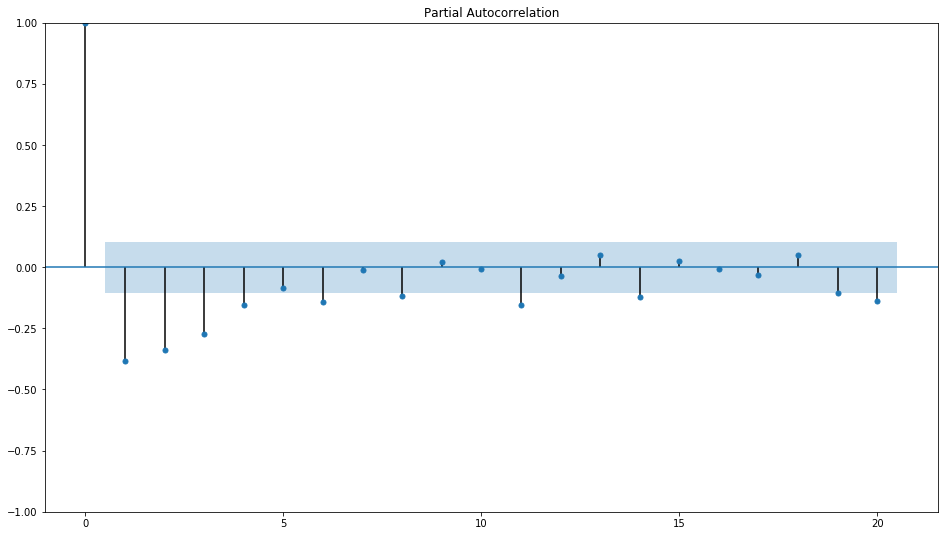

In [36]:
# AutoCorrelação Parcial - Com Diferenciação
plot_pacf(df_diff[coluna], lags=20)
plt.show()

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
# Pegar valores dos Auto-Arima levantados anteriormente

In [53]:
# OBS: caso use Box-Cox, informar o lambda no parâmetro lambda

#Usando base IndicadoresPrediçao.xlsx

# Rotina 01 / TempoMinutos 

sarima = SARIMAX(df[coluna], freq='D', order=(2, 1, 2), seasonal_order=(0, 0, 0, 12)).fit() #  AUTO TIME SERIES [auto_ts] - sem normalização
#1106.84964057287

# sarima = SARIMAX(df[coluna], freq='D', order=(1, 1, 1), seasonal_order=(0, 0, 0, 12)).fit() #  AUTO TIME SERIES [auto_ts] - com normalização
# 1110.8541828432185

(sarima.resid ** 2).mean()

C:\Users\Michael\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1106.84964057287

In [56]:
# RMSE /  MSE
print('RMSE: ', np.sqrt(sarima.mse))
print('MSE: ', sarima.mse)

RMSE:  33.26934986700025
MSE:  1106.8496405728695


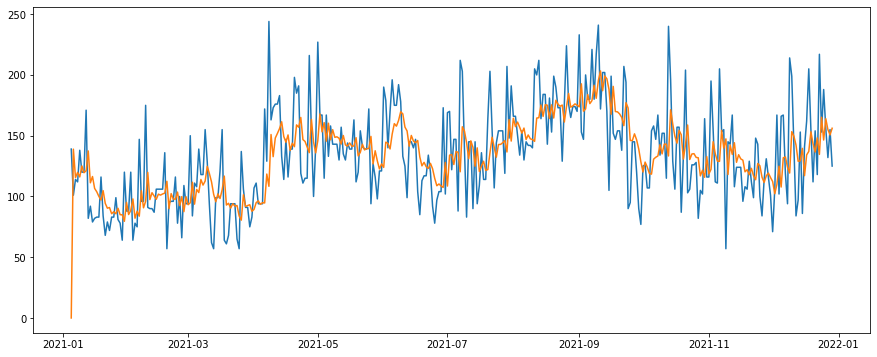

In [42]:
plt.figure(figsize=(15, 6))
plt.plot(df[coluna])
plt.plot(sarima.predict(typ='levels'))

In [43]:
sarima.forecast()

2021-12-30    144.819488
Freq: D, dtype: float64

In [44]:
sarima.fittedvalues

DiaInicio
2021-01-05      0.000000
2021-01-06    138.915071
2021-01-07    115.530173
2021-01-08    119.805018
2021-01-09    116.074381
                 ...    
2021-12-25    146.461271
2021-12-26    163.970779
2021-12-27    155.057081
2021-12-28    150.641802
2021-12-29    156.130344
Length: 359, dtype: float64

In [45]:
sarima.resid

DiaInicio
2021-01-05    139.000000
2021-01-06    -37.915071
2021-01-07     -1.530173
2021-01-08     -7.805018
2021-01-09     21.925619
                 ...    
2021-12-25     41.538729
2021-12-26     -7.970779
2021-12-27    -23.057081
2021-12-28      4.358198
2021-12-29    -31.130344
Length: 359, dtype: float64

In [ ]:
# Teste de Ljung-Box 
??????????????? somente para os resíduos

In [ ]:
# Teste de Ljung-Box – VERIFICAR A NORMALIDADE DOS RESÍDUOS 

# Teste Ljung–Box: determina se algum grupo de autocorrelações de uma série 
# temporal é diferente de zero. Em outras palavras, avaliar se as séries de 
# observações ao longo do tempo é aleatória e independente, normalmente 
# distribuídos com média zero e variância constante.

# H0: independência da Série Temporal, isto é, resíduos não correlacionados no tempo
# H1: dependência da Série Temporal, isto é, resíduos correlacionados, indicando que o modelo 
# não capturou alguma estrutura que indica um erro sistemático
# Teste de Ljung-Box - p-valor < 0,05 - Rejeição de H0
# O ideal é não rejeitar a hipótese nula, ou seja, p_value deve ser >= 0.05

In [46]:
import statsmodels.api as sm

In [47]:
sm.stats.acorr_ljungbox(sarima.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,9.232647,0.510176


In [48]:
sm.stats.acorr_ljungbox(sarima.resid, lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,17.888387,0.268579


In [49]:
# Segundo Morettin e Toloi (2004), basta utilizar entre 10 e 15 primeiras autocorrelações
# Ver documentação
# Conforme acima passou nos 2 casos, com 10 e 15 lags

In [50]:
# Lista os testes até "x" lags
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
re = lb_test(sarima.resid, lags=20) 
print(re)

      lb_stat  lb_pvalue
1    0.069236   0.792452
2    0.069982   0.965614
3    0.070590   0.995116
4    1.441506   0.836950
5    1.604202   0.900741
6    2.628726   0.853792
7    4.212878   0.754958
8    6.820401   0.556128
9    7.117895   0.624846
10   9.232647   0.510176
11  13.246013   0.277551
12  14.202373   0.287972
13  14.313162   0.352165
14  17.845068   0.213929
15  17.888387   0.268579
16  18.379894   0.302125
17  19.877154   0.280561
18  20.948530   0.282018
19  25.131840   0.156248
20  25.297335   0.190292
